In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
#loading the dataset
df = pd.read_csv('heart_disease_uci.csv')

In [6]:
#displaying the first 5 rows
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
#checkiing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [8]:
#checking the statistical information of the data
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [9]:
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

#### Data Cleaning

In [10]:
#checking for duplicate values
df.duplicated().sum()

0

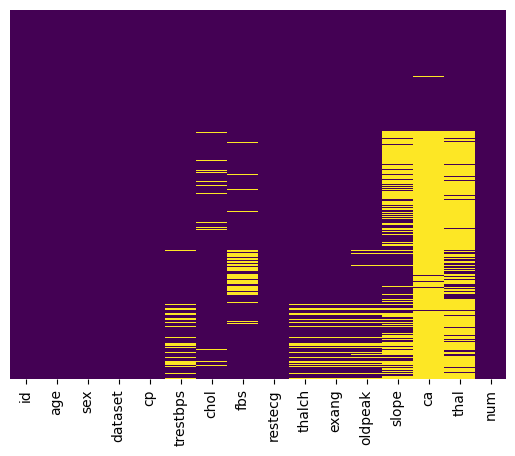

In [11]:
#checking for missing values using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [12]:
#checking for missing values 
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [13]:
#filling the numerical missing values mean
df.fillna(df[['trestbps','chol','thalch','oldpeak','ca']].mean(), inplace = True)

In [14]:
#creating instance of unknown to fill in the categorical missing values
df.fillna({'fbs':'Unknown','restecg':'Unknown','exang':'Unknown','slope':'Unknown','thal':'Unknown'}, inplace = True)

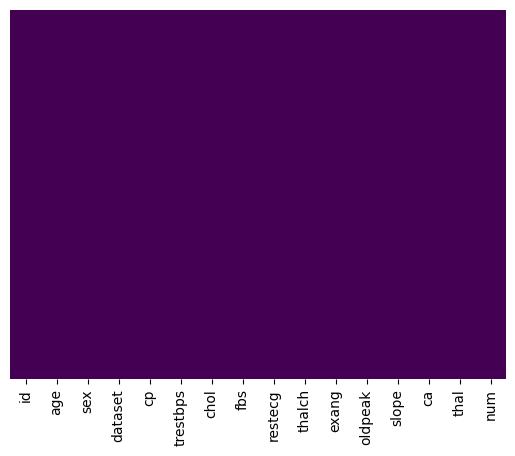

In [15]:
#rechecking for missing values using heatmap
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [16]:
#checking for unique values
df.nunique()

id          920
age          50
sex           2
dataset       4
cp            4
trestbps     62
chol        218
fbs           3
restecg       4
thalch      120
exang         3
oldpeak      54
slope         4
ca            5
thal          4
num           5
dtype: int64

#### Exploratory Data Analysis

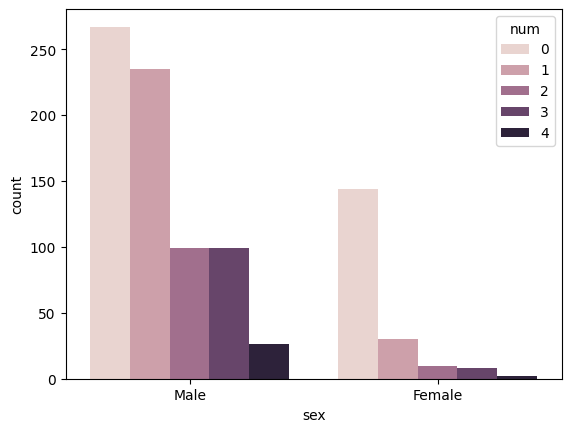

In [17]:
#Comparing heart disease occurrence between genders
sns.countplot(x='sex', hue='num', data=df)
plt.show()

Based on this dataset the visualisation above shows heart disease occurence between female and male and the graph show that more male has heart disease with about 10-25 male with heart disease compared to female with about just 5- 10 female with heart disease, and the graph also show that 250+ men does not have heart disease while 120-140 female doesnt have, this might be as a result of more excercise done by male, more insight and certainity would be uncover to as at why so many men are heart disease free. 

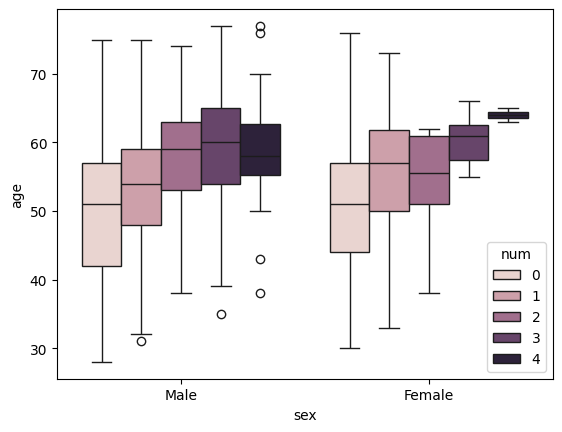

In [18]:
#heart disease rate by sex and age
sns.boxplot(x='sex', y='age', hue='num', data=df)
plt.show()

The Box plot above show the number of male and female with their heart conduction. this graph helps us to understand that heart disease spans a wide a age range, with some younger male affected. while for female smaller spread, i will be going further with my analysis to uncover why and what is leading to the heart disease.

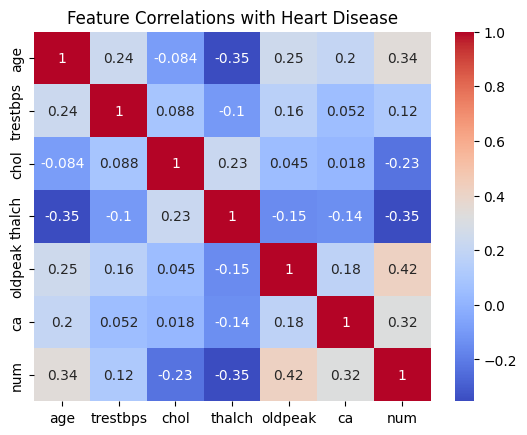

In [19]:
#Feature Correlation Matrix

#using the numerical columns
numeric = df[['age','trestbps','chol','thalch','oldpeak','ca','num']]
sns.heatmap(numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations with Heart Disease')
plt.show()


The heat map above shows the feature correlations with heart disease indicating the strongest predictors to be:

1)oldpeak: ST depression induced by exercise relative to rest

2)ca: number of major vessels (0-3) colored by fluoroscopy

3)thalach: maximum heart rate achieved

These features are giving solid signals of cardiac stress response and structural issues, which are textbook indicators of heart disease.

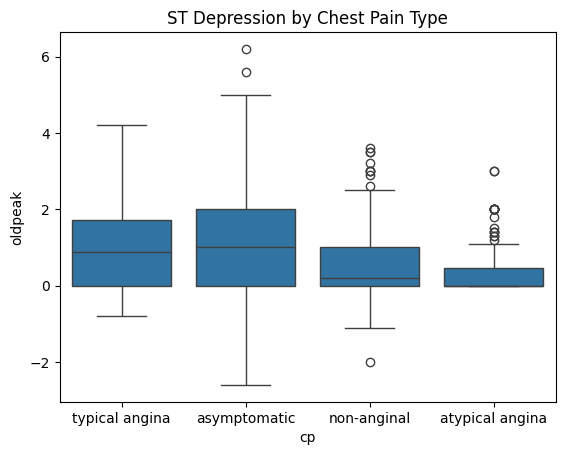

In [20]:
#boxplot showing how ST depression varies across chest pain categories
sns.boxplot(x='cp', y='oldpeak', data=df)
plt.title('ST Depression by Chest Pain Type')
plt.show()

People with typical chest pain after or during excercise show less ST depression, those with asymptomatic symptoms often have worse cardiac stress indicators, which may mean underlying issues go unnoticed without thorough testing.

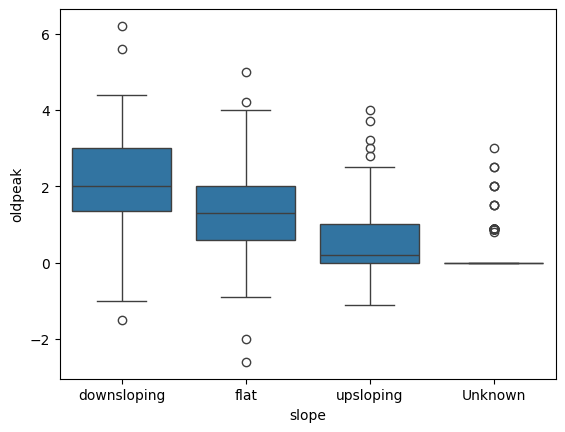

In [21]:
#uncovering what leads to st depression
sns.boxplot(x='slope', y='oldpeak', data=df)
plt.show()

The Boxplot above shows that the downsloping ST segments are often red flags for ischemia, especially when combined with high oldpeak.

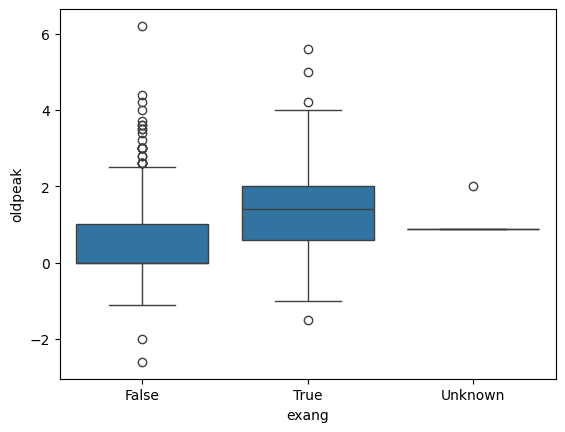

In [22]:
#exang (exercise-induced angina) vs. oldpeak
sns.boxplot(x='exang', y='oldpeak', data=df)
plt.show()

### Key Insights: Heart Disease Risk Factors
The data reveals strong patterns in how heart disease presents, especially in cases where symptoms may not be obvious:

Vessel Blockage (ca): Patients with more blocked vessels have a significantly higher likelihood of heart disease—clear evidence of structural obstruction.

ST Depression (oldpeak): Elevated in patients with silent (asymptomatic) chest pain and those who experience angina during exercise. Suggests the heart is under stress and not receiving enough oxygen.

Maximum Heart Rate (thalach): Lower in patients diagnosed with heart disease. Indicates reduced cardiac performance under physical strain.

ST Segment Slope (slope): Downsloping ST segments correlate with the highest levels of ST depression—clinically tied to myocardial ischemia.

Exercise-Induced Angina (exang): These patients show higher ST depression, implying coronary artery disease triggered by physical exertion.

Chest Pain Type (cp): Patients with asymptomatic chest pain (no physical discomfort reported) exhibit elevated ST depression, suggesting heart risk masked by silent symptoms.

What This Means:
The dataset indicates heart disease is not always loud and obvious. Instead, it often hides in silent ischemia, poor stress response, and measurable physiological changes—like blocked arteries and reduced heart rate.

Stakeholder takeaway: A data-driven screening strategy should go beyond subjective symptoms. Silent risk factors like abnormal heart rate behavior, vessel blockage, and ST segment changes offer more reliable predictors and should inform early interventions or diagnostic pathways.

### Heart Disease Prediction Model using Random Forest and XGBooster

In [23]:
#converting categorical column to binary using pd.get_dummies
df_encoded = pd.get_dummies(df, columns=['fbs','restecg','cp', 'thal', 'slope', 'sex', 'exang'],dtype =float, drop_first=True)
df_encoded

,id,age,dataset,trestbps,chol,thalch,oldpeak,ca,num,fbs_True,...,cp_typical angina,thal_fixed defect,thal_normal,thal_reversable defect,slope_downsloping,slope_flat,slope_upsloping,sex_Male,exang_True,exang_Unknown
0,1,63,Cleveland,145.000000,233.0,150.000000,2.300000,0.000000,0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,67,Cleveland,160.000000,286.0,108.000000,1.500000,3.000000,2,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,3,67,Cleveland,120.000000,229.0,129.000000,2.600000,2.000000,1,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,4,37,Cleveland,130.000000,250.0,187.000000,3.500000,0.000000,0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,41,Cleveland,130.000000,204.0,172.000000,1.400000,0.000000,0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,VA Long Beach,127.000000,333.0,154.000000,0.000000,0.676375,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
916,917,62,VA Long Beach,132.132404,139.0,137.545665,0.878788,0.676375,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
917,918,55,VA Long Beach,122.000000,223.0,100.000000,0.000000,0.676375,2,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
918,919,58,VA Long Beach,132.132404,385.0,137.545665,0.878788,0.676375,0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [24]:
#using valuecount to check if there is an imbalance in the data target column
df['num'].value_counts()

num
0    411
1    265
2    109
3    107
4     28
Name: count, dtype: int64

In [25]:
#using smote so as for the model to be able to predict for 4
from imblearn.over_sampling import SMOTE
X = df_encoded.drop(columns = ['id','dataset','num'], axis=1) 
y = df_encoded['num']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train the model
modelForest = RandomForestClassifier(class_weight="balanced", n_estimators=100, random_state=42)
modelForest.fit(X_train, y_train)
y_prediction = modelForest.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print(confusion_matrix(y_test, y_prediction))
print('\n')
print("Accuracy:", accuracy_score(y_test, y_prediction))
print('\n')
print(classification_report(y_test, y_prediction))

[[73  6  4  2  0]
 [17 47 10  7  0]
 [ 1  4 62  4  1]
 [ 2  5  7 65  5]
 [ 0  1  2  1 85]]


Accuracy: 0.8077858880778589


              precision    recall  f1-score   support

           0       0.78      0.86      0.82        85
           1       0.75      0.58      0.65        81
           2       0.73      0.86      0.79        72
           3       0.82      0.77      0.80        84
           4       0.93      0.96      0.94        89

    accuracy                           0.81       411
   macro avg       0.80      0.81      0.80       411
weighted avg       0.81      0.81      0.80       411



In [28]:
from xgboost import XGBClassifier
model = XGBClassifier(objective='multi:softmax', num_class=5)

In [29]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_class=5, ...)

In [30]:
Xgb_pred = model.predict(X_test)

In [31]:
print(confusion_matrix(y_test, Xgb_pred))
print('\n')
print(classification_report(y_test, Xgb_pred))

[[69  8  5  3  0]
 [13 53  7  8  0]
 [ 2  3 62  5  0]
 [ 1  5  4 72  2]
 [ 1  2  1  1 84]]


              precision    recall  f1-score   support

           0       0.80      0.81      0.81        85
           1       0.75      0.65      0.70        81
           2       0.78      0.86      0.82        72
           3       0.81      0.86      0.83        84
           4       0.98      0.94      0.96        89

    accuracy                           0.83       411
   macro avg       0.82      0.83      0.82       411
weighted avg       0.83      0.83      0.83       411



In [32]:
#saving the cleaned dataset for powerbi visualization
df.to_csv('cleaned_HeartDiseasedata.csv', index=False)

In [33]:
#extracting the importance features that indirect impact the targeted column
importance_df = pd.DataFrame({
    'Features': X_train.columns,
    'importance':model.feature_importances_
})

In [34]:
importance_df.sort_values(by='importance', ascending=False)

,Features,importance
11,cp_atypical angina,0.131440
21,exang_True,0.067532
8,restecg_lv hypertrophy,0.064593
5,ca,0.057238
22,exang_Unknown,0.054847
20,sex_Male,0.049045
12,cp_non-anginal,0.047955
9,restecg_normal,0.043664
18,slope_flat,0.042522
15,thal_normal,0.040321


In [35]:
#saving the XGBoost model
import xgboost as xgb
model.save_model("Xgb_model.json")

In [36]:
#checking if the model is saved successfully
import os
file_path = "Xgb_model.json"
if os.path.exists(file_path) and os.path.getsize(file_path)>0:
    print("Model file saved successfully.")
else:
    print("Failed to save model.")

Model file saved successfully.
